# Visualização



## Erro relativo

### 1. Importações 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 2. Exemplo de uso:

Ao inserir o valor  real e o valor aproximado, sendo um número que contem várias casa decimais e o valor aproximado com cerca de duas casas decimais, respectivamente, a função `erro_relativo` retornará o erro relativo entre os valores, isto é, o quanto a aproximação está distante do valor real, em proporção ao valor real.

### 3. Função

Dado o valor decimal 2.71828

In [ ]:
def erro_relativo(valor_real: float, valor_aproximado: float) -> float:
    ''' Calcula o erro do valor aproximado em proporção ao valor real.
    Retornando a divisão entre a diferença dos valores pelo valor real, em módulo.

    Args:
        valor_real(Float) = valor inicial com varias casas iniciais
        valor_aproximado(Float) = arrendondamento do valor real

    Returns:
        float: erro relativo com até sete casas decimais
    '''


    erro_relativo = (valor_real - valor_aproximado) / valor_real


    if erro_relativo < 0:
        return round(-erro_relativo,7)
    else:
        return round(erro_relativo,7)

resultado = erro_relativo(2.71828, 2.72)
print(f"Erro relativo encontrado: {resultado}")

Erro relativo encontrado: 0.0006328


### 4. Visualização:

A ideia geométrica do erro relativo associa uma curva real (que contém os valores reais que uma variável assume) e uma curva aproximada (com o valor aproximado ao longo da curva real) a um curva relativa ao erro entre os valores em função do valor real, onde oscilações grandes da curva representam uma maior distância entre o valor real e o valor aproximado e a suavidade da  curva representa proximidade entre os dois pontos.

USANDO A FUNÇÃO $ sen(x)$ como exemplo.

/tmp/ipython-input-36119852.py:9: RuntimeWarning: invalid value encountered in divide
  erro_rel = np.abs(f_real - f_aprox) / np.abs(f_real)


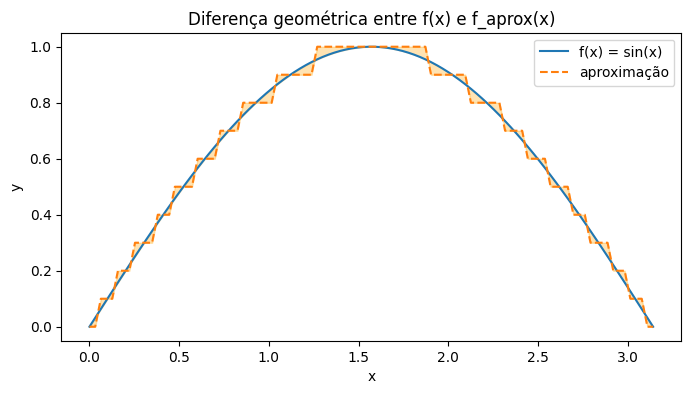

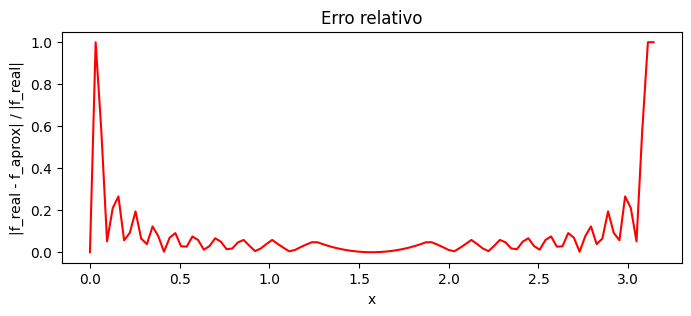

In [ ]:
# Função
x = np.linspace(0, np.pi, 100)
f_real = np.sin(x)

# Aproximação
f_aprox = np.round(np.sin(x), 1)

# Erro relativo
erro_rel = np.abs(f_real - f_aprox) / np.abs(f_real)
erro_rel[np.isnan(erro_rel)] = 0

# Plot 1 – curvas real e aproximada
plt.figure(figsize=(8,4))
plt.plot(x, f_real, label='f(x) = sin(x)')
plt.plot(x, f_aprox, '--', label='aproximação')
plt.fill_between(x, f_real, f_aprox, color='orange', alpha=0.3)
plt.title('Diferença geométrica entre f(x) e f_aprox(x)')
plt.legend()
plt.xlabel('x'); plt.ylabel('y')
plt.show()

# Plot 2 – erro relativo
plt.figure(figsize=(8,3))
plt.plot(x, erro_rel, color='red')
plt.title('Erro relativo')
plt.xlabel('x'); plt.ylabel('|f_real - f_aprox| / |f_real|')
plt.show()


## Erro Absoluto

Este notebook demonstra e visualiza a função `erro_absoluto`.

### 1. Importações

Primeiro, importamos as bibliotecas necessárias. Vamos usar `matplotlib` para criar os gráficos e `numpy` para gerar alguns dados de exemplo.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Configuração para gráficos mais nítidos (opcional)
%config InlineBackend.figure_format = 'retina'

### 2. Definição da Função

Aqui está a função que queremos analisar.

In [ ]:
def erro_absoluto(number1: float, number2: float) -> float:
    
    """Calcula o erro absoluto entre dois números.

    Args:
        number1 (float): recebe um numero do tipo float
        number2 (float): recebe um numero do tipo float

    Returns:
        float: retorna a diferença absoluta entre os dois números, em módulo
    """
    
    return abs(number1 - number2)

### 3. Exemplos Básicos

Vamos testar a função com alguns valores para verificar seu comportamento.

In [ ]:
print(f"Erro entre 10 e 8:   {erro_absoluto(10, 8)}")
print(f"Erro entre 8 e 10:   {erro_absoluto(8, 10)}")
print(f"Erro entre 5 e 5:    {erro_absoluto(5, 5)}")
print(f"Erro entre -10 e -5: {erro_absoluto(-10, -5)}")
print(f"Erro entre 10 e -10: {erro_absoluto(10, -10)}")

### 4. Visualização 1: Reta Numérica

O erro absoluto é simplesmente a **distância** entre dois pontos em uma reta numérica. Vamos visualizar isso.

In [ ]:
# Valores de exemplo
num1 = 5
num2 = 8.5
erro = erro_absoluto(num1, num2)

# Configuração do gráfico
plt.figure(figsize=(10, 2))

# Desenha a reta e os pontos
plt.plot([num1, num2], [0, 0], 'o', markersize=10, color='blue')
plt.axhline(0, color='black', linewidth=0.5)

# Adiciona texto para os números
plt.text(num1, 0.01, f'{num1}', ha='center', fontsize=12)
plt.text(num2, 0.01, f'{num2}', ha='center', fontsize=12)

# Desenha a seta do erro
plt.annotate('', xy=(num1, -0.01), xytext=(num2, -0.01), 
             arrowprops=dict(arrowstyle='<->', color='red', lw=2))
plt.text((num1 + num2) / 2, -0.02, f'Erro Absoluto = {erro}', 
         ha='center', va='top', color='red', fontsize=12)

# Limpa os eixos
plt.yticks([])
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Erro Absoluto como Distância na Reta Numérica', fontsize=14)
plt.show()

### 5. Visualização 2: Comparação de Valores (Ex: Real vs. Previsto)

Em ciência de dados e estatística, o erro absoluto é frequentemente usado para medir a diferença entre um valor real (verdadeiro) e um valor previsto (por um modelo, por exemplo).

Podemos visualizar isso em um gráfico de dispersão:
* O **eixo X** terá os valores reais.
* O **eixo Y** terá os valores previstos.
* Uma linha diagonal (onde `y = x`) representa a "previsão perfeita".
* O **erro absoluto** é a distância *vertical* (ou horizontal) de cada ponto até essa linha perfeita.

In [ ]:
# Gerar dados de exemplo
np.random.seed(42) # Para resultados reproduzíveis
valores_reais = np.array([10, 20, 30, 40, 50, 60, 70, 80])
valores_previstos = valores_reais + np.random.normal(0, 5, valores_reais.shape)

# Calcular os erros
erros = [erro_absoluto(real, prev) for real, prev in zip(valores_reais, valores_previstos)]

# Criar o gráfico
plt.figure(figsize=(8, 8))

# Linha de previsão perfeita (y=x)
limites = [min(valores_reais.min(), valores_previstos.min()), 
           max(valores_reais.max(), valores_previstos.max())]
limites = [limites[0] * 0.9, limites[1] * 1.1] # Adiciona uma margem
plt.plot(limites, limites, 'r--', label='Previsão Perfeita (Real = Previsto)')

# Gráfico de dispersão dos pontos
plt.scatter(valores_reais, valores_previstos, label='Previsões do Modelo', zorder=10)

# Linhas de erro (vlines)
for i in range(len(valores_reais)):
    plt.vlines(x=valores_reais[i], 
                 ymin=min(valores_reais[i], valores_previstos[i]), 
                 ymax=max(valores_reais[i], valores_previstos[i]), 
                 color='gray', linestyle=':', label='Erro Absoluto' if i == 0 else "")

# Configurações do gráfico
plt.xlabel('Valores Reais', fontsize=12)
plt.ylabel('Valores Previstos', fontsize=12)
plt.title('Visualização do Erro Absoluto (Real vs. Previsto)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal') # Garante que a escala de X e Y seja a mesma
plt.show()

### 5.1. Distribuição dos Erros

Finalmente, podemos simplesmente plotar a magnitude de cada erro em um gráfico de barras para ver quais pontos tiveram o maior erro.

In [ ]:
indices = np.arange(len(erros))

plt.figure(figsize=(10, 5))
plt.bar(indices, erros, color='orange', alpha=0.8)

plt.xlabel('Ponto de Dados (Índice)')
plt.ylabel('Erro Absoluto')
plt.title('Magnitude do Erro Absoluto por Ponto de Dados')
plt.xticks(indices, [f'Ponto {i+1}' for i in indices])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 6. Visualização 3: Superfície de Erro

Podemos também visualizar a função `erro_absoluto(x, y)` como uma superfície 3D. O erro será o eixo Z. Veremos um "vale" ou "dobra" onde `x = y`, pois é nesse ponto que o erro é zero.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Criar uma grade de valores
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Calcular o erro absoluto para cada par (x, y)
Z = erro_absoluto(X, Y)

# Criar o gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('Number 1 (x)')
ax.set_ylabel('Number 2 (y)')
ax.set_zlabel('Erro Absoluto (z)')
ax.set_title('Superfície 3D da Função Erro Absoluto', fontsize=16)

plt.show()